In [68]:
#as always, let's start by loading some required python modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd

# Loading the dataset into the repository
Total_data=pd.read_csv("../project_data/Bio165_InfluenzaAIGG_Assay.csv")

In [69]:
# Saving columns for plotting: 
Time =  Total_data['day']

In [70]:
# Untransforming Data:
Total_data2 = Total_data.copy()
Total_data2['Ctrl'] = 2**(Total_data['Ctrl'])  
Total_data2['Vax'] = 2**(Total_data['Vax'])
Total_data2['IFNB'] = 2**(Total_data['IFNB'])
Total_data2['Vax_IFNB'] = 2**(Total_data['Vax_IFNB'])

display(Total_data2)

,Unnamed: 0,antibody,Species,in_2023IIV,in_2023LAIV,sti,day,donor,IgType,dilution,Ctrl,Vax,IFNB,Vax_IFNB
0,1,INFLUENZA-A,Influenza,1,1,IIV,3,donor_43,IgG,10,10.0,18.0,44.0,282.0
1,2,INFLUENZA-A,Influenza,1,1,IIV,3,donor_44,IgG,10,28.5,1.0,2.0,9.0
2,3,INFLUENZA-A,Influenza,1,1,IIV,3,donor_46,IgG,10,29.5,12.0,13.0,33.0
3,4,INFLUENZA-A,Influenza,1,1,IIV,3,donor_54,IgG,10,86.0,84.5,126.0,568.0
4,5,INFLUENZA-A,Influenza,1,1,IIV,7,donor_43,IgG,10,18.5,623.0,95.0,6287.0
5,6,INFLUENZA-A,Influenza,1,1,IIV,7,donor_44,IgG,10,59.0,57.0,2.5,1223.0
6,7,INFLUENZA-A,Influenza,1,1,IIV,7,donor_46,IgG,10,37.0,2627.5,84.0,5059.0
7,8,INFLUENZA-A,Influenza,1,1,IIV,7,donor_54,IgG,10,127.0,980.0,1616.0,4844.0
8,9,INFLUENZA-A,Influenza,1,1,IIV,10,donor_43,IgG,10,16.0,567.0,71.5,4806.0
9,10,INFLUENZA-A,Influenza,1,1,IIV,10,donor_44,IgG,10,66.0,244.0,1.0,707.0


In [94]:
# Calculate the mean and standard error for each group
mean_Total_data = Total_data2.groupby(["sti","day"], as_index=False).agg({"Ctrl": ['mean', 'sem'],"Vax": ['mean', 'sem'],"IFNB": ['mean', 'sem'], "Vax_IFNB": ['mean', 'sem']})

# Rename the columns
mean_Total_data.columns = ['_'.join(col).strip() for col in mean_Total_data.columns.values]

# Display the result
display(mean_Total_data)

,sti_,day_,Ctrl_mean,Ctrl_sem,Vax_mean,Vax_sem,IFNB_mean,IFNB_sem,Vax_IFNB_mean,Vax_IFNB_sem
0,IIV,3,38.500000,16.455749,28.875000,18.872792,46.250000,28.030861,223.000000,130.512452
1,IIV,7,60.375000,23.700716,1071.875000,552.258257,449.375000,389.421760,4353.250000,1090.747937
2,IIV,10,57.125000,17.609627,1187.500000,640.056052,429.000000,371.597396,4396.125000,1334.705560
3,LAIV,3,34.333333,24.503968,198.500000,110.254630,82.000000,40.730824,383.333333,165.667673
4,LAIV,7,51.666667,40.806794,2953.833333,1235.153173,671.333333,581.022470,2862.666667,1009.460637
5,LAIV,10,45.666667,38.254992,3191.166667,1337.479481,718.000000,657.482002,2741.833333,943.854258


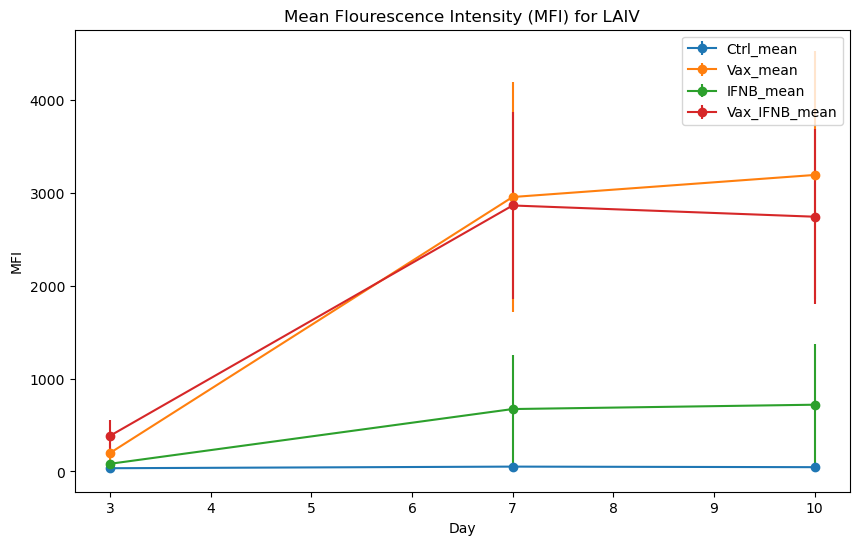

In [108]:
# Filter data for LAIV and IIV separately
laiv_data = mean_Total_data[mean_Total_data['sti_'] == 'LAIV']
iiv_data = mean_Total_data[mean_Total_data['sti_'] == 'IIV']

# Plot for LAIV
plt.figure(figsize=(10, 6))

plt.errorbar(laiv_data['day_'], laiv_data["Ctrl_mean"], yerr=laiv_data["Ctrl_sem"], label="Ctrl_mean", marker="o")
plt.errorbar(laiv_data['day_'], laiv_data["Vax_mean"],yerr=laiv_data["Vax_sem"], label="Vax_mean", marker="o")
plt.errorbar(laiv_data['day_'], laiv_data["IFNB_mean"], yerr=laiv_data["IFNB_sem"],label="IFNB_mean", marker="o")
plt.errorbar(laiv_data['day_'], laiv_data["Vax_IFNB_mean"], yerr=laiv_data["Vax_IFNB_sem"],label="Vax_IFNB_mean", marker="o")
    
plt.xlabel('Day')
plt.ylabel('MFI')
plt.title('Mean Flourescence Intensity (MFI) for LAIV')
plt.legend()
plt.show()

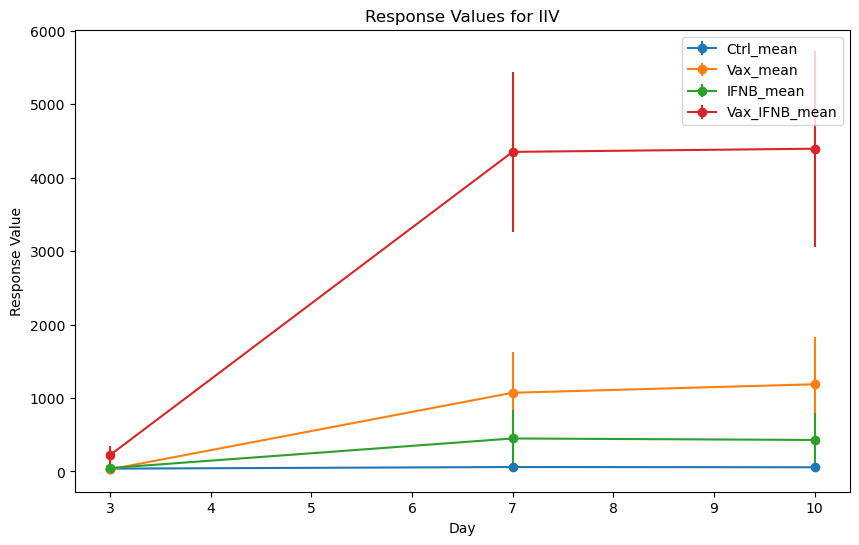

In [96]:
# Plot for IIV
plt.figure(figsize=(10, 6))

plt.errorbar(iiv_data['day_'], iiv_data["Ctrl_mean"], yerr=iiv_data["Ctrl_sem"], label="Ctrl_mean", marker="o")
plt.errorbar(iiv_data['day_'], iiv_data["Vax_mean"],yerr=iiv_data["Vax_sem"], label="Vax_mean", marker="o")
plt.errorbar(iiv_data['day_'], iiv_data["IFNB_mean"], yerr=iiv_data["IFNB_sem"],label="IFNB_mean", marker="o")
plt.errorbar(iiv_data['day_'], iiv_data["Vax_IFNB_mean"], yerr=iiv_data["Vax_IFNB_sem"],label="Vax_IFNB_mean", marker="o")
    
plt.xlabel('Day')
plt.ylabel('Response Value')
plt.title('Response Values for IIV')
plt.legend()
plt.show()

In [92]:
# Now, we isolate the data for 2 other Influenza strains for analysis:

Total_data3=pd.read_csv("../project_data/TotalLuminexData.csv")

Total_data4=Total_data3[Total_data3['antibody'] == 'B/Colorado/06/2017/B/Victoria/2019']
Total_data5 = Total_data4[Total_data4['IgType'] == 'IgG']
CO_all_Strain_data =Total_data5[Total_data5['dilution']==10]



display(CO_all_Strain_data)

,Unnamed: 0,antibody,Species,sti,day,donor,IgType,dilution,Ctrl,Vax,IFNB,Vax_IFNB
1178,1179,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_43,IgG,10,8.634811,6.276124,6.483816,8.533330
1182,1183,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_44,IgG,10,3.087463,0.000000,1.807355,6.199672
1186,1187,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_46,IgG,10,4.285402,6.982994,5.870365,7.797662
1190,1191,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,3,donor_54,IgG,10,8.967226,8.167418,8.445015,8.779719
1194,1195,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_43,IgG,10,8.172428,10.418380,9.365229,12.995855
1198,1199,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_44,IgG,10,2.700440,2.906891,7.764872,12.839105
1202,1203,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_46,IgG,10,4.882643,12.478138,10.203960,14.254549
1206,1207,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,7,donor_54,IgG,10,9.318543,12.329516,11.832692,12.369734
1210,1211,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,10,donor_43,IgG,10,7.459432,10.699572,8.977280,12.632654
1214,1215,B/Colorado/06/2017/B/Victoria/2019,Influenza,IIV,10,donor_44,IgG,10,2.169925,4.129283,7.164907,12.969656


In [80]:
# Now, we seperate on basis of LAIV vs. IIV:

CO_LAIV_data = CO_all_Strain_data[CO_all_Strain_data['sti'] == 'LAIV']
CO_IIV_data = CO_all_Strain_data[CO_all_Strain_data['sti'] == 'IIV']


In [109]:
# Now, we repeat the plotting process:
mean_Total_data2 = CO_all_Strain_data.groupby(["sti","day"], as_index=False).agg({"Ctrl": ['mean', 'sem'],"Vax": ['mean', 'sem'],"IFNB": ['mean', 'sem'], "Vax_IFNB": ['mean', 'sem']})

# Rename the columns
mean_Total_data2.columns = [''.join(col).strip() for col in mean_Total_data.columns.values]

# Display the result
display(mean_Total_data2)

,sti_,day_,Ctrl_mean,Ctrl_sem,Vax_mean,Vax_sem,IFNB_mean,IFNB_sem,Vax_IFNB_mean,Vax_IFNB_sem
0,IIV,3,6.243726,1.498104,5.356634,1.827670,5.651638,1.394090,7.827596,0.581351
1,IIV,7,6.268513,1.516008,9.533231,2.258015,9.791688,0.847817,13.114811,0.402524
2,IIV,10,6.021472,1.458338,10.008257,2.027791,9.505051,0.956024,13.085725,0.506104
3,LAIV,3,4.816601,1.747651,8.749375,1.210073,6.405208,1.574571,9.956362,0.831554
4,LAIV,7,4.922659,1.925745,13.308849,0.919973,8.350822,1.355625,13.514663,0.441233
5,LAIV,10,4.786515,1.599505,13.487307,0.810902,8.136947,1.431001,13.444945,0.411786


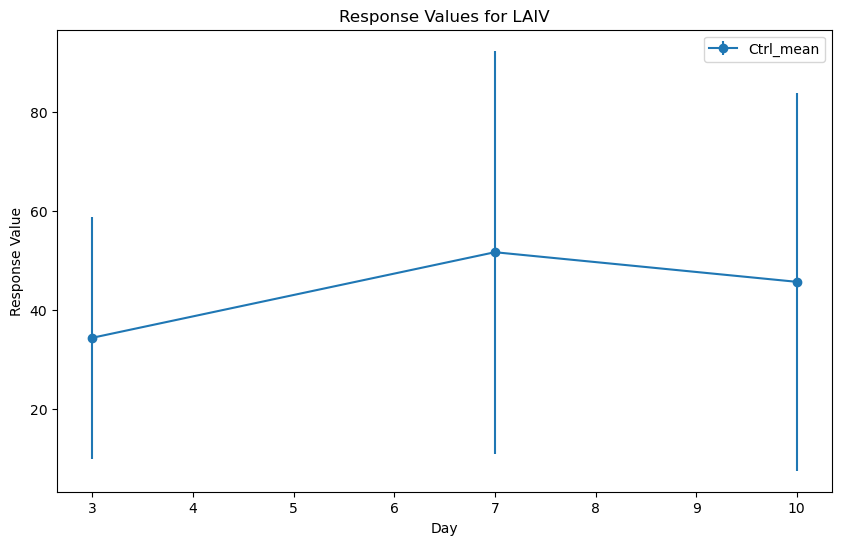

In [112]:
# Filter data for LAIV and IIV separately
CO_laiv_data = mean_Total_data2[mean_Total_data2['sti_'] == 'LAIV']
CO_iiv_data = mean_Total_data2[mean_Total_data2['sti_'] == 'IIV']

# Plot for LAIV
plt.figure(figsize=(10, 6))

plt.errorbar(laiv_data['day_'], laiv_data["Ctrl_mean"], yerr=laiv_data["Ctrl_sem"], label="Ctrl_mean", marker="o")
# plt.errorbar(laiv_data['d_a_y__'], laiv_data["V_a_x___m_e_a_n"],yerr=laiv_data["V_a_x___s_e_m"], label="Vax_mean", marker="o")
# plt.errorbar(laiv_data['d_a_y__'], laiv_data["I_F_N_B___m_e_a_n"], yerr=laiv_data["I_F_N_B___s_e_m"],label="IFNB_mean", marker="o")
# plt.errorbar(laiv_data['d_a_y__'], laiv_data["V_a_x___I_F_N_B___m_e_a_n"], yerr=laiv_data["V_a_x___I_F_N_B___s_e_m"],label="Vax_IFNB_mean", marker="o")
    
plt.xlabel('Day')
plt.ylabel('Response Value')
plt.title('Response Values for LAIV')
plt.legend()
plt.show()